### in this notebook we'll create a single_neuron network with a custom loss function. we'll go step by step, outputting the results after each step. 

update: i also checked this linear function approximation with the hidden layer having:<br> * 2 neurons<br> * 3 neurons<br> * 2 neurons and a relu. <br>
**the best performing one was the first one, which had a single neuron and no non linearity**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

define an arbitrary function that we'll use to generate data. in the end we'll check how close to the function coefficientts the NN gets its weights

In [2]:
def func(x1,x2):
    y = 5*x1 + 3*x2
    return y

number of rows in the dataset

In [3]:
nrows = 100

In [4]:
x1arr = np.random.rand(nrows)
x1arr

array([0.050068  , 0.84498799, 0.72784169, 0.94081578, 0.58217923,
       0.64228947, 0.77250922, 0.15685539, 0.58680821, 0.66842721,
       0.88905711, 0.08561517, 0.87744716, 0.11617113, 0.71267819,
       0.5267985 , 0.91217647, 0.07185369, 0.57245179, 0.08344017,
       0.356722  , 0.13520191, 0.49856391, 0.47275517, 0.57308482,
       0.634168  , 0.05156826, 0.29313658, 0.55837194, 0.11265917,
       0.31055219, 0.70020807, 0.22061643, 0.42124878, 0.46305994,
       0.49094348, 0.96582555, 0.55599764, 0.92721262, 0.02120169,
       0.33619199, 0.55923556, 0.59729185, 0.01613233, 0.3699732 ,
       0.3995424 , 0.58463159, 0.11265454, 0.64654845, 0.94931237,
       0.83333767, 0.18009311, 0.19543324, 0.28018774, 0.12539806,
       0.58278805, 0.23984008, 0.33563093, 0.42028527, 0.02320714,
       0.30135748, 0.87805445, 0.82547895, 0.89844043, 0.46805557,
       0.27536572, 0.37416875, 0.65231934, 0.8889608 , 0.05356112,
       0.48275505, 0.42946732, 0.33421367, 0.33840954, 0.50471

In [5]:
x2arr = np.random.randn(nrows)
x2arr

array([ 1.3054329 , -0.67189762,  0.10420288, -0.42815782,  0.94499736,
        0.58996012, -0.30233602,  0.51459026,  0.05471141,  0.44930304,
       -1.57024277,  0.60756188,  0.2519383 ,  1.76389333, -1.20595089,
        0.32298373, -0.45884621, -1.07707827,  0.46451688, -0.40533786,
       -1.36520751, -1.13792001,  1.20644316,  0.5364743 , -0.66539437,
        0.37085203, -0.739343  ,  0.09903334, -1.44224731, -0.98703714,
       -2.14623584, -0.27303021,  1.27886594, -0.40321017, -0.67849104,
       -0.1455063 ,  0.64804976,  0.03677285,  2.12397151,  0.73134822,
        0.57865611,  0.91133496, -0.45398108,  1.92879508, -0.49909793,
       -1.33013491, -0.32153068, -1.37958834,  0.14906386,  1.05619978,
       -0.35351034, -0.11687257, -0.69717855, -0.71328866,  0.9955973 ,
       -0.37235738,  1.84323189, -0.05845357,  0.72124944,  0.75713602,
        0.78319889, -0.39960136,  0.82005522, -0.0210953 , -0.68688316,
        2.02424798, -1.3550224 ,  1.21871681,  0.44512436,  1.63

create the output using the created function

In [6]:
yarr = np.zeros_like(x1arr)
for i,(x1,x2) in enumerate(zip(x1arr, x2arr)):
    yarr[i] = func(x1,x2)

In [7]:
yarr

array([ 4.16663868,  2.20924707,  3.95181707,  3.41960542,  5.74588822,
        4.98132772,  2.95553801,  2.32804775,  3.0981753 ,  4.69004517,
       -0.26544275,  2.25076151,  5.14305071,  5.87253566, -0.05446173,
        3.60294369,  3.18434373, -2.87196633,  4.25580962, -0.79881272,
       -2.31201252, -2.73775048,  6.11214903,  3.97319876,  0.86924099,
        4.28339609, -1.96018766,  1.76278295, -1.53488226, -2.39781558,
       -4.88594654,  2.68194972,  4.93967996,  0.89661338,  0.27982658,
        2.01819851,  6.773277  ,  2.89030676, 11.00797762,  2.30005312,
        3.41692825,  5.53018266,  1.62451599,  5.86704691,  0.35257219,
       -1.99269274,  1.9585659 , -3.57549231,  3.67993386,  7.91516117,
        3.10615731,  0.54984785, -1.11436943, -0.7389273 ,  3.61378224,
        1.79686811,  6.72889605,  1.50279391,  4.26517464,  2.38744374,
        3.85638404,  3.19146814,  6.58756041,  4.42891624,  0.27962834,
        7.44957253, -2.19422347,  6.91774713,  5.78017708,  5.15

In [8]:
import torch
import torch.nn as nn

define a single neuron NN without a non-linearity

In [9]:
class OneNeuron(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 1)
        
    def forward(self, x):
        # let's try without a non-linearity
        x = self.fc1(x)
        
        return x
        

prepare the feature and label data. This is a regression problem (not classification)

In [10]:
num_features = 2

In [11]:
inp_features = [[xa,xb] for xa,xb in zip(x1arr, x2arr)]
inp_features

[[0.05006799605578893, 1.3054329006243928],
 [0.8449879857600886, -0.6718976187830579],
 [0.7278416870853469, 0.10420287699848166],
 [0.940815776358621, -0.4281578214224693],
 [0.5821792296643593, 0.9449973585569108],
 [0.6422894701114118, 0.5899601223376443],
 [0.7725092153444414, -0.3023360219101611],
 [0.156855392598945, 0.5145902633309144],
 [0.5868082130755182, 0.054711412148212055],
 [0.6684272081668727, 0.4493030431413059],
 [0.8890571133704634, -1.5702427732758593],
 [0.08561517061317547, 0.6075618843978915],
 [0.8774471624583672, 0.25193829931680933],
 [0.1161711321008293, 1.7638933316869738],
 [0.7126781905562747, -1.2059508927466944],
 [0.5267984970939946, 0.32298373361925536],
 [0.9121764704312859, -0.4588462063908733],
 [0.07185369483571746, -1.0770782671488712],
 [0.5724517943861501, 0.46451688130100927],
 [0.08344017197890152, -0.4053378602386035],
 [0.35672199932040904, -1.3652075060980018],
 [0.13520190894806638, -1.1379200070474405],
 [0.4985639106876518, 1.2064431576

convert the arrays to pytorch tensors

In [12]:
inp_feat_tensor = torch.tensor(inp_features, dtype=torch.float32)
inp_feat_tensor

tensor([[ 0.0501,  1.3054],
        [ 0.8450, -0.6719],
        [ 0.7278,  0.1042],
        [ 0.9408, -0.4282],
        [ 0.5822,  0.9450],
        [ 0.6423,  0.5900],
        [ 0.7725, -0.3023],
        [ 0.1569,  0.5146],
        [ 0.5868,  0.0547],
        [ 0.6684,  0.4493],
        [ 0.8891, -1.5702],
        [ 0.0856,  0.6076],
        [ 0.8774,  0.2519],
        [ 0.1162,  1.7639],
        [ 0.7127, -1.2060],
        [ 0.5268,  0.3230],
        [ 0.9122, -0.4588],
        [ 0.0719, -1.0771],
        [ 0.5725,  0.4645],
        [ 0.0834, -0.4053],
        [ 0.3567, -1.3652],
        [ 0.1352, -1.1379],
        [ 0.4986,  1.2064],
        [ 0.4728,  0.5365],
        [ 0.5731, -0.6654],
        [ 0.6342,  0.3709],
        [ 0.0516, -0.7393],
        [ 0.2931,  0.0990],
        [ 0.5584, -1.4422],
        [ 0.1127, -0.9870],
        [ 0.3106, -2.1462],
        [ 0.7002, -0.2730],
        [ 0.2206,  1.2789],
        [ 0.4212, -0.4032],
        [ 0.4631, -0.6785],
        [ 0.4909, -0

In [13]:
ytensor = torch.tensor(yarr, dtype=torch.float32)
ytensor

tensor([ 4.1666,  2.2092,  3.9518,  3.4196,  5.7459,  4.9813,  2.9555,  2.3280,
         3.0982,  4.6900, -0.2654,  2.2508,  5.1431,  5.8725, -0.0545,  3.6029,
         3.1843, -2.8720,  4.2558, -0.7988, -2.3120, -2.7378,  6.1121,  3.9732,
         0.8692,  4.2834, -1.9602,  1.7628, -1.5349, -2.3978, -4.8859,  2.6819,
         4.9397,  0.8966,  0.2798,  2.0182,  6.7733,  2.8903, 11.0080,  2.3001,
         3.4169,  5.5302,  1.6245,  5.8670,  0.3526, -1.9927,  1.9586, -3.5755,
         3.6799,  7.9152,  3.1062,  0.5498, -1.1144, -0.7389,  3.6138,  1.7969,
         6.7289,  1.5028,  4.2652,  2.3874,  3.8564,  3.1915,  6.5876,  4.4289,
         0.2796,  7.4496, -2.1942,  6.9177,  5.7802,  5.1597,  6.8629,  4.5463,
         2.7305, -0.0556,  1.4408, -3.3910, -2.3422,  3.2998,  1.0259, -1.1538,
         1.0677,  0.8748,  2.0567,  0.5583,  5.2172,  0.3696,  6.7283,  2.2281,
         5.0588, -0.3327,  7.4973,  6.3758,  1.6868,  1.2854,  7.0058,  1.0343,
         1.0412,  3.4462,  2.8610,  2.75

instantiate the model

In [70]:
model1 = OneNeuron(num_features)

In [71]:
model1

OneNeuron(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [72]:
model1.parameters()

<generator object Module.parameters at 0x7f0f59eb4d60>

In [73]:
optimizer = torch.optim.Adam(model1.parameters())

In [74]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2288,  0.5930]], requires_grad=True)

make one forward pass

In [75]:
yhat = model1(inp_feat_tensor)
yhat

tensor([[ 1.0234e+00],
        [-3.3095e-01],
        [ 1.5606e-01],
        [-2.0834e-01],
        [ 6.8795e-01],
        [ 4.6367e-01],
        [-9.5226e-02],
        [ 5.3002e-01],
        [ 1.5897e-01],
        [ 3.7428e-01],
        [-8.7372e-01],
        [ 6.0145e-01],
        [ 2.0944e-01],
        [ 1.2801e+00],
        [-6.1735e-01],
        [ 3.3178e-01],
        [-2.1998e-01],
        [-3.9434e-01],
        [ 4.0526e-01],
        [ 1.3300e-03],
        [-6.3036e-01],
        [-4.4491e-01],
        [ 8.6210e-01],
        [ 4.7074e-01],
        [-2.6489e-01],
        [ 3.3560e-01],
        [-1.8943e-01],
        [ 2.5244e-01],
        [-7.2217e-01],
        [-3.5028e-01],
        [-1.0829e+00],
        [-6.1309e-02],
        [ 9.6863e-01],
        [-7.4686e-02],
        [-2.4748e-01],
        [ 6.2181e-02],
        [ 4.2410e-01],
        [ 1.5538e-01],
        [ 1.3081e+00],
        [ 6.8959e-01],
        [ 5.2699e-01],
        [ 6.7323e-01],
        [-1.4506e-01],
        [ 1

In [76]:
ytensor.shape

torch.Size([100])

In [77]:
yhat.shape

torch.Size([100, 1])

In [78]:
ytensor.unsqueeze(1).shape

torch.Size([100, 1])

In [79]:
(ytensor.unsqueeze(1) - yhat)**2

tensor([[9.8800e+00],
        [6.4526e+00],
        [1.4408e+01],
        [1.3162e+01],
        [2.5583e+01],
        [2.0409e+01],
        [9.3072e+00],
        [3.2329e+00],
        [8.6389e+00],
        [1.8626e+01],
        [3.7000e-01],
        [2.7202e+00],
        [2.4341e+01],
        [2.1090e+01],
        [3.1685e-01],
        [1.0701e+01],
        [1.1589e+01],
        [6.1386e+00],
        [1.4827e+01],
        [6.4023e-01],
        [2.8280e+00],
        [5.2571e+00],
        [2.7563e+01],
        [1.2267e+01],
        [1.2862e+00],
        [1.5585e+01],
        [3.1356e+00],
        [2.2811e+00],
        [6.6050e-01],
        [4.1924e+00],
        [1.4463e+01],
        [7.5255e+00],
        [1.5769e+01],
        [9.4342e-01],
        [2.7806e-01],
        [3.8260e+00],
        [4.0312e+01],
        [7.4798e+00],
        [9.4087e+01],
        [2.5936e+00],
        [8.3518e+00],
        [2.3590e+01],
        [3.1314e+00],
        [1.9947e+01],
        [2.2315e-01],
        [1

In [80]:
torch.mean((ytensor.unsqueeze(1) - yhat)**2)

tensor(11.9626, grad_fn=<MeanBackward0>)

calculate the loss

In [81]:
loss = torch.mean((ytensor.unsqueeze(1) - yhat)**2)
loss

tensor(11.9626, grad_fn=<MeanBackward0>)

make one backward pass

In [82]:
loss.backward()

check the weights and the gradients

In [83]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2288,  0.5930]], requires_grad=True)

In [84]:
model1.fc1.weight.grad

tensor([[-2.8548, -4.2447]])

now update the weights and check them again

In [85]:
optimizer.step()

In [86]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2278,  0.5940]], requires_grad=True)

the weights were updated. now zero the gradients and repeat the process

In [87]:
optimizer.zero_grad()

In [88]:
model1.fc1.weight.grad

tensor([[0., 0.]])

let's repeat the process a few times, keeping track of the loss and weights

In [89]:
epochs = 10000

In [90]:
model1.fc1.weight.detach().numpy().squeeze()[1]

0.5939695

In [91]:
model1.fc1.bias.detach().numpy()[0]

0.26177087

In [92]:
running_w1 = []
running_w2 = []
running_loss = []
running_bias = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model1(inp_feat_tensor)
    loss = torch.mean((ytensor.unsqueeze(1) - output)**2)
    
    w1 = model1.fc1.weight.detach().numpy().squeeze()[0]
    w2 = model1.fc1.weight.detach().numpy().squeeze()[1]
    b = model1.fc1.bias.detach().numpy()[0]
    running_loss.append(loss.item())
    running_w1.append(w1)
    running_w2.append(w2)
    running_bias.append(b)
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}, w1: {w1}, w2: {w2}, b: {b}')
    

epoch: 0- loss: 11.950860977172852, w1: -0.22776195406913757, w2: 0.5939695239067078, b: 0.2617708742618561
epoch: 100- loss: 10.817373275756836, w1: -0.12870483100414276, w2: 0.6931852698326111, b: 0.3606126308441162
epoch: 200- loss: 9.775592803955078, w1: -0.032244790345430374, w2: 0.7902418971061707, b: 0.4562360942363739
epoch: 300- loss: 8.821017265319824, w1: 0.061571478843688965, w2: 0.8851006627082825, b: 0.5485321283340454
epoch: 400- loss: 7.948468208312988, w1: 0.152768075466156, w2: 0.9777804017066956, b: 0.6374734044075012
epoch: 500- loss: 7.1529645919799805, w1: 0.24136760830879211, w2: 1.068296194076538, b: 0.723024845123291
epoch: 600- loss: 6.429704666137695, w1: 0.3273915946483612, w2: 1.1566600799560547, b: 0.8051444888114929
epoch: 700- loss: 5.774054050445557, w1: 0.4108611047267914, w2: 1.242881417274475, b: 0.8837829232215881
epoch: 800- loss: 5.181536674499512, w1: 0.49179771542549133, w2: 1.3269658088684082, b: 0.9588831663131714
epoch: 900- loss: 4.647823810

epoch: 7700- loss: 0.03044288605451584, w1: 4.366995811462402, w2: 2.9787631034851074, b: 0.31112366914749146
epoch: 7800- loss: 0.02622486837208271, w1: 4.412454605102539, w2: 2.980309247970581, b: 0.2886839509010315
epoch: 7900- loss: 0.022448694333434105, w1: 4.456374645233154, w2: 2.9817986488342285, b: 0.2670215666294098
epoch: 8000- loss: 0.01908799260854721, w1: 4.498694896697998, w2: 2.9832303524017334, b: 0.24616380035877228
epoch: 8100- loss: 0.016115760430693626, w1: 4.539357662200928, w2: 2.9846034049987793, b: 0.22613684833049774
epoch: 8200- loss: 0.013504519127309322, w1: 4.578310489654541, w2: 2.9859156608581543, b: 0.2069646418094635
epoch: 8300- loss: 0.011226722970604897, w1: 4.615502834320068, w2: 2.987166404724121, b: 0.18866923451423645
epoch: 8400- loss: 0.009254638105630875, w1: 4.650893211364746, w2: 2.9883553981781006, b: 0.17127041518688202
epoch: 8500- loss: 0.007561111357063055, w1: 4.6844401359558105, w2: 2.9894793033599854, b: 0.15478529036045074
epoch: 8

Text(0, 0.5, 'loss')

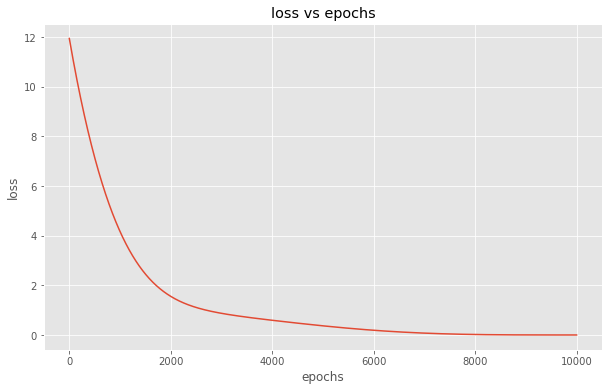

In [93]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_loss)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'w1')

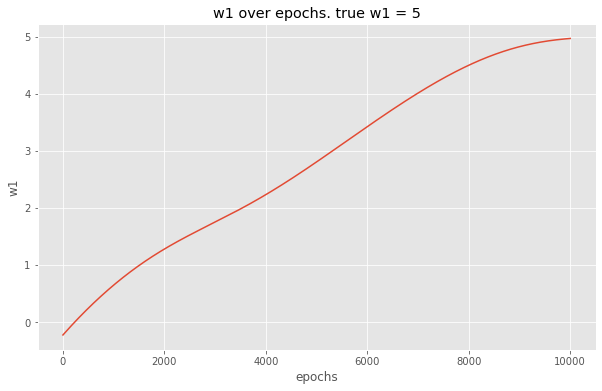

In [94]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w1)
plt.title('w1 over epochs. true w1 = 5')
plt.xlabel('epochs')
plt.ylabel('w1')

Text(0, 0.5, 'w2')

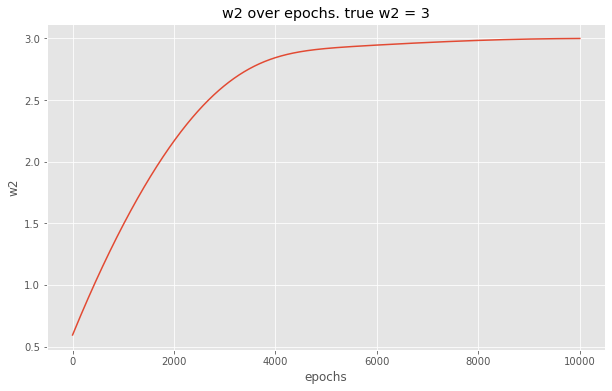

In [95]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w2)
plt.title('w2 over epochs. true w2 = 3')
plt.xlabel('epochs')
plt.ylabel('w2')

Text(0, 0.5, 'bias')

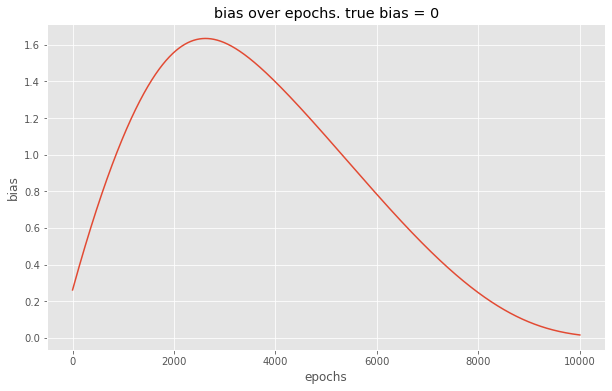

In [96]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_bias)
plt.title('bias over epochs. true bias = 0')
plt.xlabel('epochs')
plt.ylabel('bias')

### inference

as we can see, it took around 6000 epochs to get the loss down to an acceptable level. as the function was linear, it took only one neuron to approximate it.

final weights:

In [41]:
model1.fc1.weight

Parameter containing:
tensor([[4.9660, 2.9988]], requires_grad=True)

### Let's try with a multi-neuron network and see if it performs better

In [51]:
class MultiNeuron(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(num_features, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [52]:
num_features = 2
num_hidden = 3

In [53]:
model2 = MultiNeuron(num_features, num_hidden)
model2

MultiNeuron(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)

In [54]:
optimizer = torch.optim.Adam(model2.parameters())
criterion = torch.nn.MSELoss()
epochs = 10000

In [55]:
running_loss = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model2(inp_feat_tensor)
    loss = criterion(output, ytensor)
    
    running_loss.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}')

epoch: 0- loss: 16.98735809326172
epoch: 100- loss: 15.36236572265625
epoch: 200- loss: 13.458440780639648
epoch: 300- loss: 11.549721717834473
epoch: 400- loss: 10.146716117858887
epoch: 500- loss: 9.457202911376953
epoch: 600- loss: 9.23934555053711
epoch: 700- loss: 9.18568229675293
epoch: 800- loss: 9.164137840270996
epoch: 900- loss: 9.146910667419434
epoch: 1000- loss: 9.130705833435059
epoch: 1100- loss: 9.115387916564941
epoch: 1200- loss: 9.101051330566406
epoch: 1300- loss: 9.087779998779297
epoch: 1400- loss: 9.075623512268066
epoch: 1500- loss: 9.06460189819336
epoch: 1600- loss: 9.054723739624023
epoch: 1700- loss: 9.045963287353516
epoch: 1800- loss: 9.038289070129395
epoch: 1900- loss: 9.031649589538574
epoch: 2000- loss: 9.025982856750488
epoch: 2100- loss: 9.021217346191406
epoch: 2200- loss: 9.017268180847168
epoch: 2300- loss: 9.014049530029297
epoch: 2400- loss: 9.011474609375
epoch: 2500- loss: 9.009451866149902
epoch: 2600- loss: 9.007891654968262
epoch: 2700- los

Text(0, 0.5, 'loss')

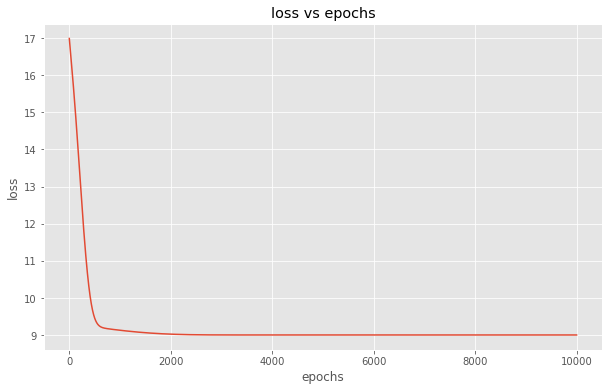

In [57]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')


**inference**: the loss decreased much faster, but not to the extent the single neuron did. The ~final loss for the single neuron network was 0.00013287848560139537, while the ~final loss for the multineuron network was 9.003952026367188

### Let's try with 2 neurons in the hidden layer

In [58]:
num_features = 2
num_hidden = 2

In [59]:
model3 = MultiNeuron(num_features, num_hidden)
model3

MultiNeuron(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [60]:
optimizer = torch.optim.Adam(model3.parameters())
criterion = torch.nn.MSELoss()
epochs = 10000

In [61]:
running_loss = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model3(inp_feat_tensor)
    loss = criterion(output, ytensor)
    
    running_loss.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}')

/home/amoel/anaconda3/envs/udacitycvenv/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0- loss: 12.426673889160156
epoch: 100- loss: 11.571282386779785
epoch: 200- loss: 10.710065841674805
epoch: 300- loss: 9.928977966308594
epoch: 400- loss: 9.45236873626709
epoch: 500- loss: 9.266873359680176
epoch: 600- loss: 9.211453437805176
epoch: 700- loss: 9.186958312988281
epoch: 800- loss: 9.167638778686523
epoch: 900- loss: 9.149937629699707
epoch: 1000- loss: 9.13357162475586
epoch: 1100- loss: 9.118518829345703
epoch: 1200- loss: 9.104741096496582
epoch: 1300- loss: 9.092187881469727
epoch: 1400- loss: 9.08079719543457
epoch: 1500- loss: 9.070496559143066
epoch: 1600- loss: 9.061220169067383
epoch: 1700- loss: 9.052903175354004
epoch: 1800- loss: 9.04548168182373
epoch: 1900- loss: 9.038895606994629
epoch: 2000- loss: 9.033085823059082
epoch: 2100- loss: 9.027999877929688
epoch: 2200- loss: 9.023584365844727
epoch: 2300- loss: 9.019787788391113
epoch: 2400- loss: 9.016558647155762
epoch: 2500- loss: 9.013842582702637
epoch: 2600- loss: 9.011595726013184
epoch: 2700- l

Text(0, 0.5, 'loss')

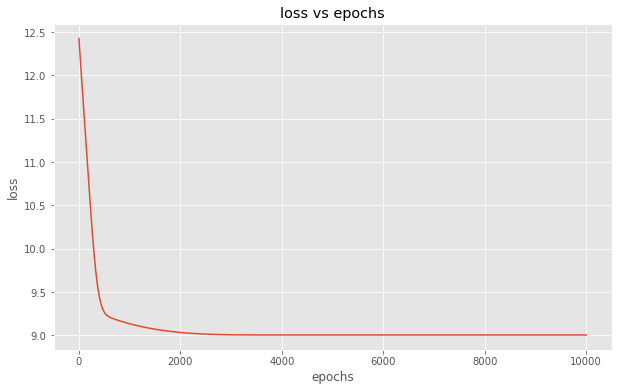

In [62]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')


**inference**: this performed almost exaclty like the network with 3 neurons in the hidden layer. the loss decreased much faster, but not to the extent the single neuron did. The ~final loss for the single neuron network was 0.00013287848560139537, while the ~final loss for the 3 network was 9.003952026367188, and the ~final loss for the 2 network was 9.003952026367188. the final losses for 2 and 3 neurons are the same

### Now let's try with a model that has a non-linearity

In [63]:
import torch.nn.functional as F

In [64]:
class MultiNeuronNonLin(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(num_features, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [65]:
num_features = 2
num_hidden = 3

In [66]:
model4 = MultiNeuronNonLin(num_features, num_hidden)
model4

MultiNeuronNonLin(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)

In [67]:
optimizer = torch.optim.Adam(model4.parameters())
criterion = torch.nn.MSELoss()
epochs = 10000

In [68]:
running_loss = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model4(inp_feat_tensor)
    loss = criterion(output, ytensor)
    
    running_loss.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}')

/home/amoel/anaconda3/envs/udacitycvenv/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0- loss: 15.391031265258789
epoch: 100- loss: 14.671073913574219
epoch: 200- loss: 14.152242660522461
epoch: 300- loss: 13.711808204650879
epoch: 400- loss: 13.309819221496582
epoch: 500- loss: 12.936675071716309
epoch: 600- loss: 12.58973503112793
epoch: 700- loss: 12.266371726989746
epoch: 800- loss: 11.965014457702637
epoch: 900- loss: 11.684449195861816
epoch: 1000- loss: 11.42373275756836
epoch: 1100- loss: 11.182126998901367
epoch: 1200- loss: 10.958587646484375
epoch: 1300- loss: 10.752228736877441
epoch: 1400- loss: 10.562215805053711
epoch: 1500- loss: 10.387727737426758
epoch: 1600- loss: 10.2279691696167
epoch: 1700- loss: 10.082154273986816
epoch: 1800- loss: 9.949517250061035
epoch: 1900- loss: 9.829306602478027
epoch: 2000- loss: 9.720787048339844
epoch: 2100- loss: 9.623235702514648
epoch: 2200- loss: 9.535940170288086
epoch: 2300- loss: 9.458209037780762
epoch: 2400- loss: 9.389357566833496
epoch: 2500- loss: 9.328719139099121
epoch: 2600- loss: 9.275642395019531

Text(0, 0.5, 'loss')

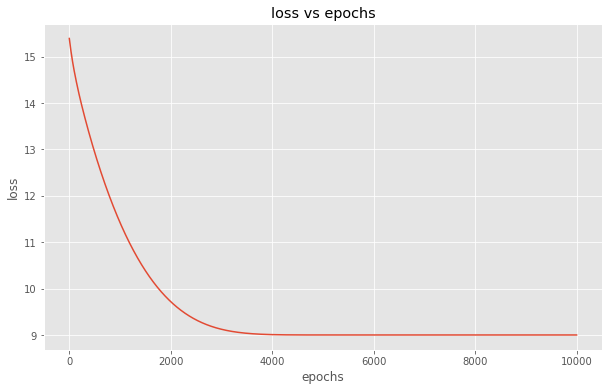

In [69]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,epochs), running_loss)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')


**inference:** we can see that adding the non-linearity did not really help. in fact the final loss for the 2 neuron network with and without relu applied is the same 9.003952026367188. and the loss of the model with relu seemed to decrease at a slower rate